# **Heart Stroke Prediction Model**


<h1>1.Introduction</h1>

According to World Health Organisation (WHO), stroke are the second leading cause of death and the third leading cause of disability globally. Stroke is the sudden death of some brain cells due to lack of oxygen when the blood flow to the brain is lost by blockage or rupture of an artery to the brain, it is also a leading cause of dementia and depression.

The objective of this study is to construct a prediction model for predicting stroke and to assess the accuracy of the model. We will explore multiple different models to see which produces reliable and repeatable results.

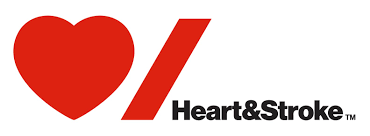

<h2>Why Grafana?</h2>

To work on the data science based research projects, the high performance tools and libraries for visualization tools and libraries required. The data scientists and researchers working on big data based projects generally need visulization and plotting libraries.

Grafana is the tool that is havinng features for plotting and visualization of data in multiple database engines. It is used as observability as well as the platform for the datasets in different formats.

Grafana allows to query, visualize, alert on and understand your metrics no matter where they are stored. create, explore, and share dashboards with your team and foster a data driven culture. 

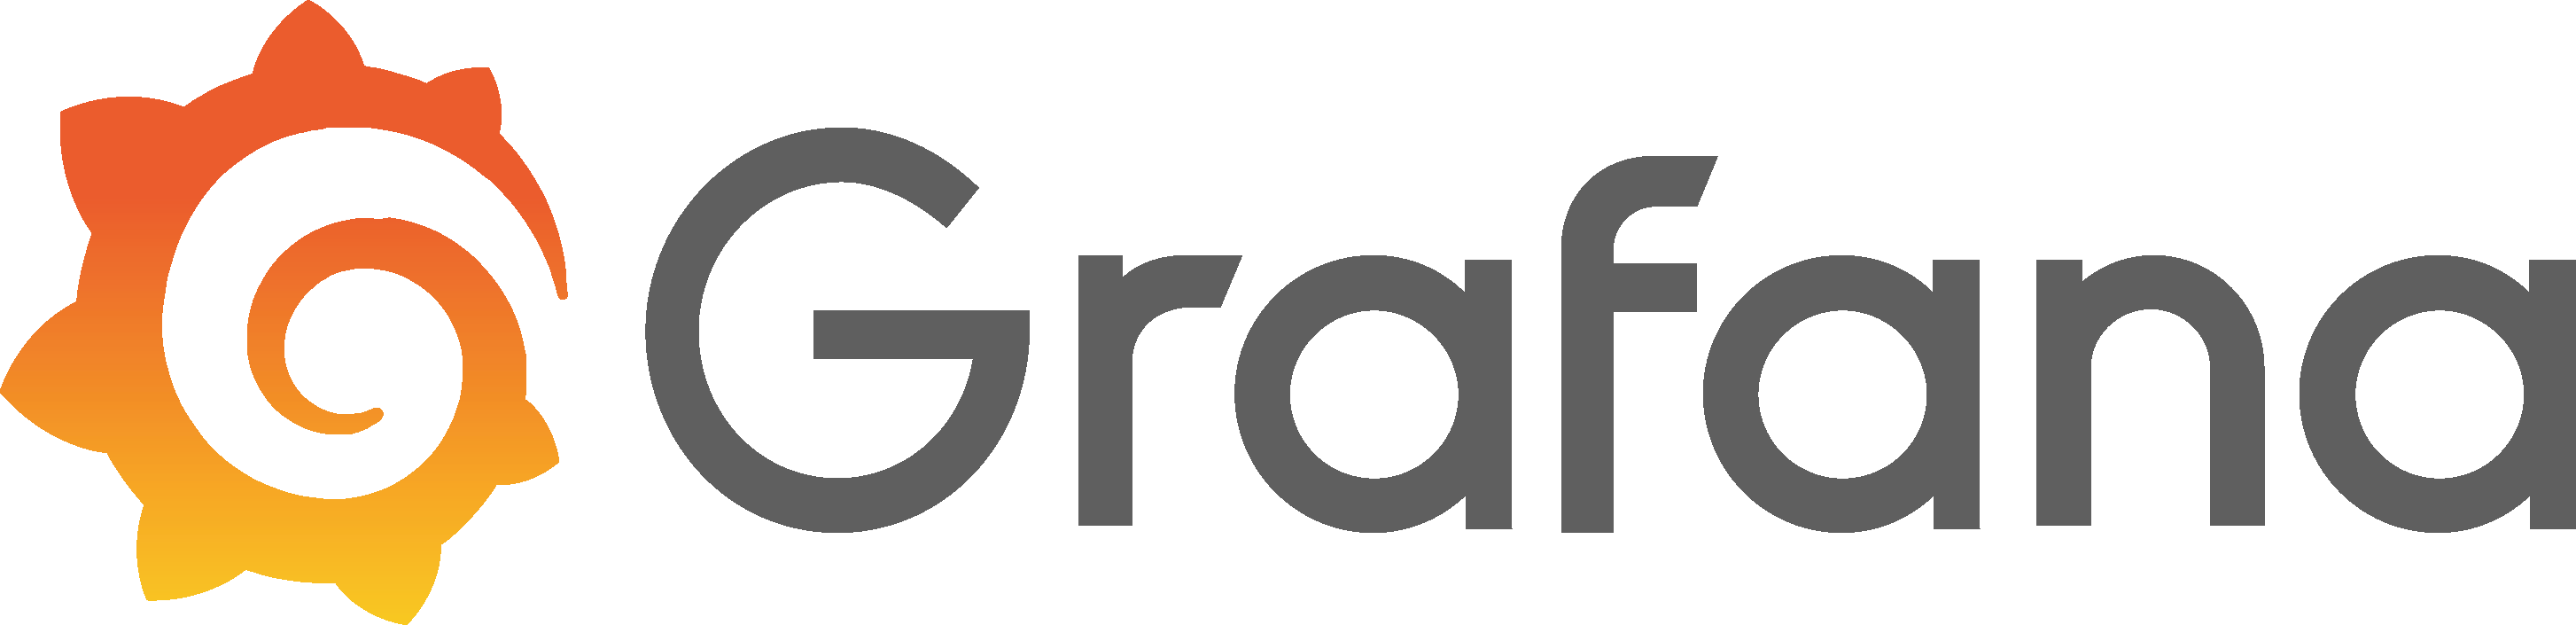

<h2>How Grafana is helping Data scientists/users.</h2><br>
Grafana is high performance tool that is used by the data scientists and researchers for multi-dimensional plotting and visualization. To complete any real time data science project, the visualization and plotting is very important and need effective platform.

Grafana Key Features helping Data scientists and researchers, key features such as **Dyanamic Dashboards, Visualization, Expore metrics, Explore logs, Alerting, Mixed Data sources, Annotations and Ad-hoc Filters**.

<h2>2.Importing Libraries and Loading dataset</h2>

<h2>About the Dataset</h2><br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [ ]:
import numpy as np #Importing Numpy library
import pandas as pd #Importing Pandas library
import matplotlib.pyplot as plt #Importing Matplotlib library
import seaborn as sns #Importing Seaborn library
%matplotlib inline
import warnings #Importing Warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#Importing Dataset
data = pd.read_csv('/content/healthcare-dataset-stroke-data(1).xls')
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


### **Attribute Information**
* 1) **id:** unique identifier
* 2) **gender:** "Male", "Female" or "Other"
* 3) **age:** age of the patient
* 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) **ever_married:** "No" or "Yes"
* 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) **Residence_type:** "Rural" or "Urban"
* 9) **avg_glucose_level:** average glucose level in blood
* 10) **bmi:** body mass index
* 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) **stroke:** 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

<h2>Data Cleaning & Exloring</h2>

In [ ]:
data_row_count, data_column_count = data.shape
print('Row Count:', data_row_count)
print('Column Count:', data_column_count)

Row Count: 5110
Column Count: 12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isna().sum() #Checking Null Values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are **201** missing values in **BMI feature**. A simple way to dealing with the missing values is to remove the rows with null values however this may potentially remove data that aren’t null. Thus, we will substitute missing values with mean of bmi and check if imputations are done.

In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean()) #Substituting missing values with mean of BMI
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<h3>4.1 ID</h3>

In [ ]:
data.id.nunique() #Checking Unqiue ID 

5110

The total number of unique id is same as row count. We do not need another identifier. Thus, we will drop this column.

In [ ]:
data = data.drop(columns ='id') #Dropping ID column
data.shape

(5110, 11)

<h3>4.2 Gender</h3>

In [ ]:
data.gender.value_counts() #Checking Male & Female gender count

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Gender needs to be categorized as binary variable. And from the analysis perspective, it will be tedious to create another variable for one row value (‘Others’). Hence, we will impute this single value with mode in this column.

In [ ]:
data['gender'] = data['gender'].replace('Other', list(data.gender.mode().values)[0])
data.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

<h2>5. Exploratory Data Analysis</h2>

<h3>5.1 Categorical Feature Analysis</h3>

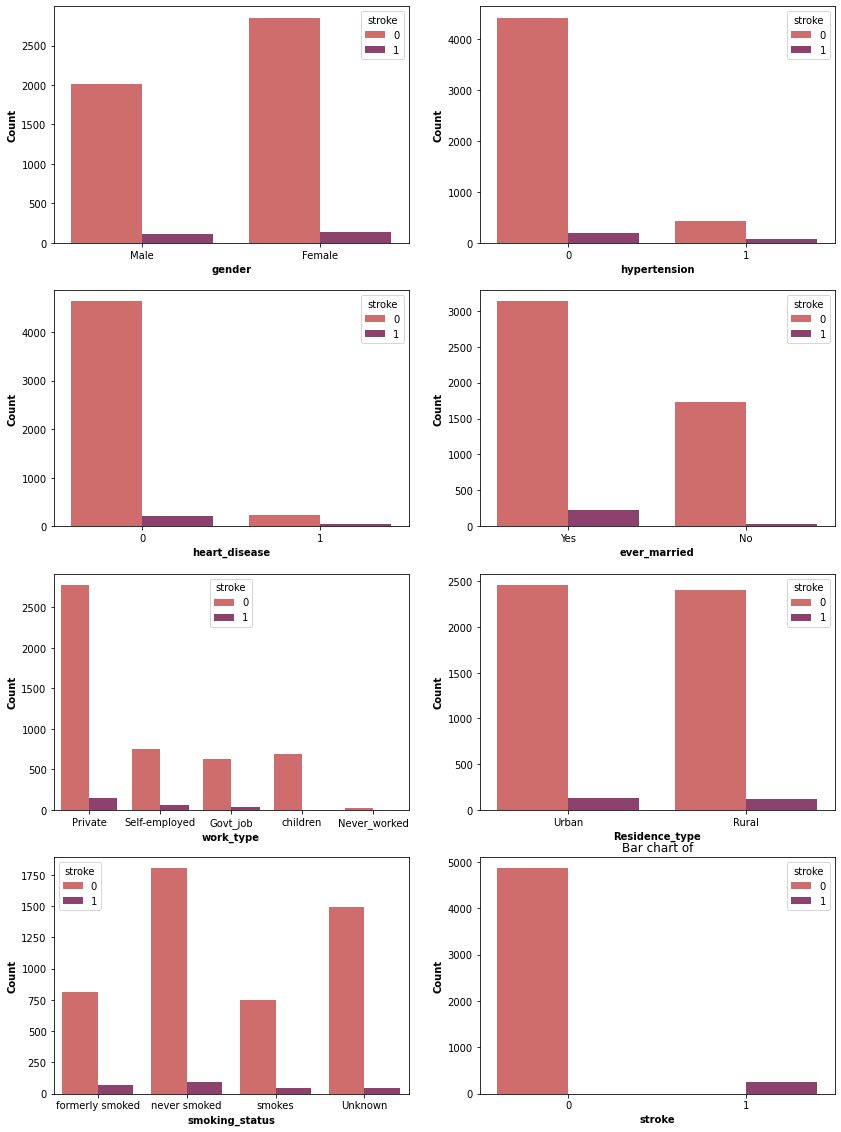

In [ ]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20)) #plotting Subplot
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

  From the above count plot, some observations can be drawn:

*  ** Hypertension**: Subjects that previously diagnosed with hypertension have highly risk of having stroke.
*   **Heart disease**: Subjects that previously diagnosed with heart disease have highly risk of having stroke.
*   **Ever married**: Subjects that ever married have highly risk of having stroke.
*   **Work type**: Subjects that have any work experience and in government related work have highly risk of having stroke while those with no work experience barely experienced stroke.
*   **Residence type**: No obvious relationship with likelihood of experiencing stroke.
*   **Smoking status**: Being a smoker or former smoker increases risk of having a stroke.



<h3>5.2 Numerical Feature Analysis</h3>

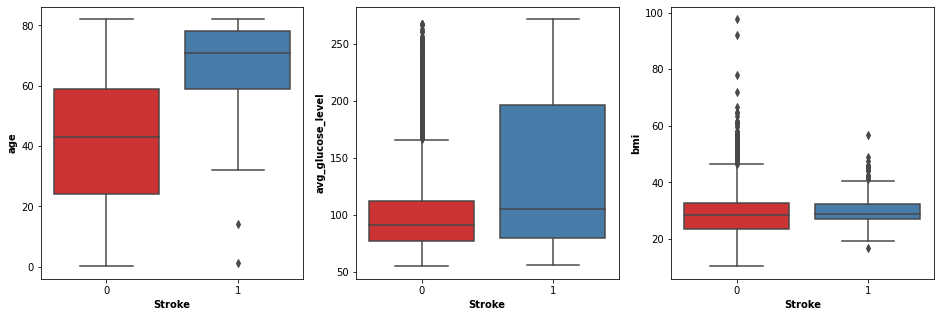

In [ ]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5)) #plotting Subplot
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=data, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

From the above boxplot, some observations can be drawn:

*   **Age**: Subjects with stroke tends to have higher mean age.
*   **Ave glucose level**: Subjects with stroke tends to have higher average glucose level.
*   **bmi**: bmi index does not give much indication on the likelihood of experiencing stroke. bmi index for super obesity is 50. Outliers in this feature should be replaced to its highest limit (50).


There are total 79 counts of outliers detected.

In [ ]:
bmi_outliers=data.loc[data['bmi']>50] #Checking outliers 
bmi_outliers['bmi'].shape

(79,)

Replace values more than 50 in bmi column to 50.

In [ ]:
data["bmi"] = pd.to_numeric(data["bmi"])
data["bmi"] = data["bmi"].apply(lambda x: 50 if x>50 else x)

By plotting boxplot of bmi column to confirm alterations are made.

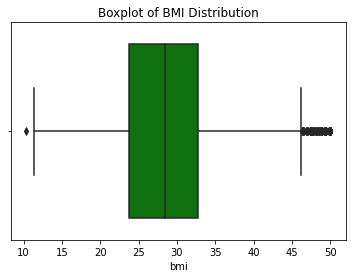

In [ ]:
sns.boxplot(data=data,x=data["bmi"],color='green')
plt.title("Boxplot of BMI Distribution");

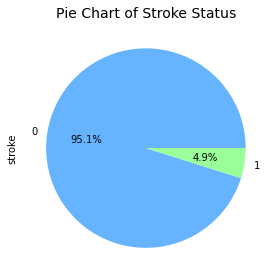

In [ ]:
plt.figure(figsize=(4,4))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

**4.9%** of the population in this dataset is diagnosed with stroke

<h3>5.3 Multicollinearity Analysis</h3>

Since correlation check only accept numerical variables, preprocessing the categorical variables becomes a necessary step, we need to convert these categorical variables to numbers encoded to 0 or 1. We use labelEncoder from sklearn.preprocessing as it will be easy to decode a particular label back later after predicting if required.

In [ ]:
from sklearn.preprocessing import LabelEncoder #importing LabelEcnoder

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [ ]:
df_en = data

df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


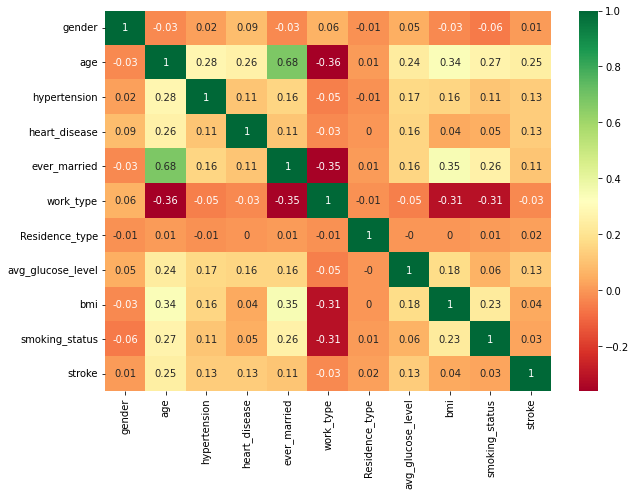

In [ ]:
#plotting correlation heatmap
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

From the above correlation matrix, we can verify the presence of multicollinearity between some of the variables. For instance, the ever_married and age column has a correlation of 0.68. Between this two attributes, age contains more information on whether one is susceptible to stroke. Thus, we will drop the ever_married column.

In [ ]:
df_en = df_en.drop(['ever_married'], axis = 1) #dropping Ever_married features

In [ ]:
df_en.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1


<h3>5.4 Final Preprocessing</h3>

Variables that are measured at different scales do not contribute equally to model fitting and might end up creating a bias. Thus, to deal with this potential problem feature standardization is usually used prior to model fitting. We have created an object of StandardScaler() and then applied fit_transform() function to apply standardization on ‘avg_glucose_level’,’bmi’ and ‘age’ columns.

In [ ]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler 
s = StandardScaler()

In [ ]:
columns = ['avg_glucose_level','bmi','age'] 
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

In [ ]:
df_en=df_en.drop(columns=columns,axis=1)

In [ ]:
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [ ]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.066746,1.051434
1,0,0,0,3,0,2,1,2.121559,0.013363,0.786070
2,1,0,1,2,0,2,1,-0.005028,0.506346,1.626390


<h2>6. Modelling</h2>

All the predictor variables will be mapped to an array x and the target variable to an array y. The target variable is ‘stroke’ column.

In [ ]:
x=df.drop(['stroke'], axis=1)
y=df['stroke']# Models
from sklearn.model_selection import train_test_split #importing train_test_split
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #importing LogisticRegression 
from sklearn.ensemble import RandomForestClassifier #importing RandomForestClassifier
from sklearn.svm import SVC #importing SVC
from sklearn.neighbors import KNeighborsClassifier #importing KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB #importing GaussianNB 
from sklearn.cluster import KMeans #importing Kmeans

# Evaluation
#importing confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)

Building models with their parameters and storing them into a dictionary. We will explore 7 algorithms to see which produces reliable and repeatable results. The 7 algorithms are:



*   Decision Tree
*   Logistic Regression
*   Random Forest
*   Support Vector Machine
*   K Nearest Neighbour
*   Naive Bayes
*   KMeans Clustering



In [ ]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Logreg model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
KMeans model fitting completed.


In [ ]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

--------------------Decision Tree--------------------
[[1394   70]
 [  64    5]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1464
           1       0.07      0.07      0.07        69

    accuracy                           0.91      1533
   macro avg       0.51      0.51      0.51      1533
weighted avg       0.92      0.91      0.91      1533

--------------------Logreg--------------------
[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

--------------------Random Forest--------------------
[[1462    2]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00

Take note that recall can be thought of as a measure of a classifiers completeness. A low recall for stroke (1) indicates many False Negatives

In [ ]:
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))

Summary of Accuracy Score


Decision Tree Model:  0.9126
Logreg Model:  0.955
Random Forest Model:  0.9537
Support Vector Machine Model:  0.9243
kNN Model:  0.9524
Naive Bayes Model:  0.8728
KMeans Model:  0.7834


From the above accuracy summary, Logistic Regression, Random Forest and KNN models all gives high accuracy score of 0.95. However, it is also important to consider the error type and recall value of each model. Models with 0.95 accuracy score generally have high false negative as shown in the confusion matrix. High false negative indicates type 2 error. For our study on stroke prediction, we want to avoid type 2 error as it means that we fail to identify subjects that has stroke and deem them stroke free instead. Inspecting from the classification report above, Naive Bayes Model has fit our objective although the accuracy is 0.87.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
gnb = GaussianNB()

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.87430168 0.84916201 0.88826816 0.87709497 0.89944134 0.88547486
 0.86592179 0.86554622 0.86834734 0.85714286]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8731





*   Using the mean cross-validation, we can conclude that we expect the model to be around 87.31% accurate on average.
*   If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 84.91% accuracy to 89.94% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
*   Our original model accuracy is 0.8728, but the mean cross-validation accuracy is 0.8731. So, the 10-fold cross-validation accuracy does result in performance improvement for this model.

<h2>8. Conclusion</h2>


1.   Various model was used to predict whether a person is subjected to stroke. **Naive Bayes** model yields a very good performance as indicated by the model accuracy which was found to be **87.28%**.
2.   Using the **mean cross-validation**, we can conclude that we expect the model to be around **87.31%** accurate on average.
3.   If we look at all the **10** scores produced by the **10-fold cross-validation**, we can also conclude that there is a relatively small variance in the accuracy between folds, hence the model is independent of the particular folds used for training.
4.   Our original model accuracy is **87.28%** and the mean cross-validation accuracy is **87.31%**. Thus, the **10-fold cross-validation** accuracy does result in performance improvement for this model.
5.   **Naive Bayes model** can be further improve by **tuning hyperparameters** to get the better result or adjusting the probablity threshold to improve its performance.




